In [28]:
import numpy as np
import os
import datetime
from skimage import io
from PIL import Image
import random
import matplotlib.pyplot as plt
import glob
import cv2

In [29]:

np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [30]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

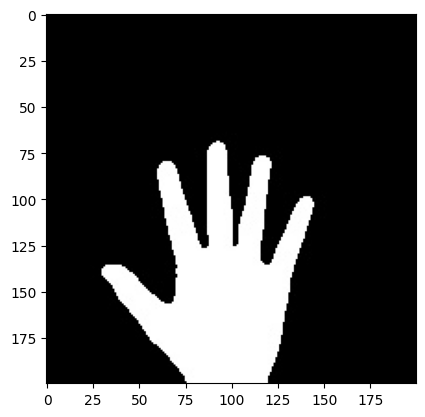

In [32]:

import cv2

cat = cv2.imread('data/five/hand1(22).jpg')
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
# cv2.imshow('image', cat)

data/five/*
2019


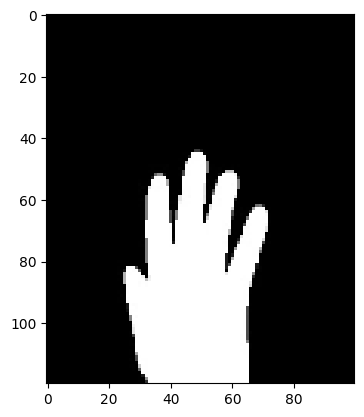

In [33]:
# path to your dataset
DATASET_PATH = 'data/five/'

gesture_path = os.path.join(DATASET_PATH, '*')
print(gesture_path)
import glob
gesture_path = glob.glob(gesture_path)

rand_index = random.randint(0, len(gesture_path))
print(len(gesture_path))
image = cv2.imread(gesture_path[rand_index])
image = cv2.resize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



In [34]:
# path to your dataset
DATASET_PATH = 'data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path
print(len(dataset_path))


6


In [35]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "data/" + str(list_of_gestures[path])
    print(dataset_path)
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    print(len(gest_path))
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,[100, 120])
            loaded_images.append(gray_image)
        k=k+1
    
len(loaded_images)

data/blank
1616
data/ok
1675
data/thumbsup
1618
data/thumbsdown
1641
data/fist
1752
data/five
2019


9600

In [39]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 118, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 98, 118, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 49, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 47, 57, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 23, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41216)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,275,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,295,750 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

In [37]:
outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

len(outputVectors)    

9600

In [31]:
print(len(loaded_images))
print(len(outputVectors))


60
60


In [40]:

X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)
# Reshape X to be 2D (number_of_samples, number_of_features)




(9600, 120, 100)
(9600, 6)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(7680, 120, 100)
(1920, 120, 100)


In [42]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)



In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7680, 100, 120, 1)
(7680, 6)
(1920, 100, 120, 1)
(1920, 6)


In [44]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("hand_gesture_recog_model3.h5")

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - categorical_accuracy: 0.6877 - loss: 3.7901 - val_categorical_accuracy: 0.9385 - val_loss: 0.1832
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - categorical_accuracy: 0.8895 - loss: 0.2578 - val_categorical_accuracy: 0.9818 - val_loss: 0.0887
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - categorical_accuracy: 0.9176 - loss: 0.1961 - val_categorical_accuracy: 0.9896 - val_loss: 0.0402
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - categorical_accuracy: 0.9313 - loss: 0.1610 - val_categorical_accuracy: 0.9911 - val_loss: 0.0329
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - categorical_accuracy: 0.9386 - loss: 0.1320 - val_categorical_accuracy: 0.9932 - val_loss: 0.0190
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - categorical_accuracy: 0.9403 - loss: 0.1288 - val_categorical_accuracy: 0.9932 - val_loss: 0.0193
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - categorical_accuracy: 0.9492 - loss: 0.10

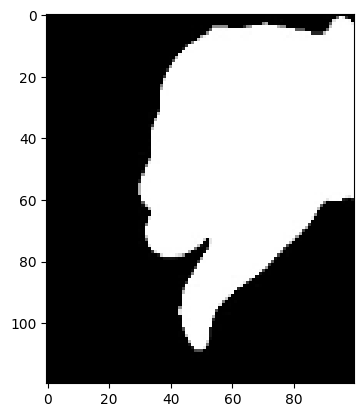

In [46]:
# cat = cv2.imread('gest1_998')
# plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
  # Should return True if the file exists
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('data/thumbsdown/thumbsdown8.jpg')
image = cv2.resize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [47]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,[100, 120])

gray_image = gray_image.reshape(1, 100, 120, 1)
gray_image.shape

(1, 100, 120, 1)

In [48]:

model.save("trained_number_gesture.h5")

In [49]:
from keras.models import load_model
model = load_model("hand_gesture_recog_model3.h5")
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 118, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 98, 118, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 49, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 47, 57, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 23, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41216)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,275,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,295,752 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
pred_idx = np.argmax(model.predict_on_batch(gray_image), axis=1)


In [27]:
pred_idx

array([3], dtype=int64)